# Noise download 

the data have been downloaded form the DANISH Enviromental Protection Agency (https://mst.dk/erhverv/tilskud-miljoeviden-og-data/data-og-databaser/miljoegis-data-om-natur-og-miljoe-paa-webkort/hent-data-udstillet-paa-miljoegis?utm_source=chatgpt.com)
in this nb the first 2 code cell are used to download and unzip the noise data. after only some of them are used for the stress modellinfing. 

thea noise data are collected and aggregate following an annual mean kind of value based on Nord2000 acustic model. 

In [4]:
'''import requests
from pathlib import Path

# Example
url = "https://files-miljoegis.mim.dk/noise2022/2022_noise_shp.zip"
save_path = Path("/mnt/raid/matteo/2022_noise_shp.zip")

# Make sure the folder exists
save_path.parent.mkdir(parents=True, exist_ok=True)

# Stream download (safe for big files)
with requests.get(url, stream=True) as r:
    r.raise_for_status()
    with open(save_path, "wb") as f:
        for chunk in r.iter_content(chunk_size=8192):
            f.write(chunk)

print(f"✅ File saved to: {save_path}")'''


'import requests\nfrom pathlib import Path\n\n# Example\nurl = "https://files-miljoegis.mim.dk/noise2022/2022_noise_shp.zip"\nsave_path = Path("/mnt/raid/matteo/2022_noise_shp.zip")\n\n# Make sure the folder exists\nsave_path.parent.mkdir(parents=True, exist_ok=True)\n\n# Stream download (safe for big files)\nwith requests.get(url, stream=True) as r:\n    r.raise_for_status()\n    with open(save_path, "wb") as f:\n        for chunk in r.iter_content(chunk_size=8192):\n            f.write(chunk)\n\nprint(f"✅ File saved to: {save_path}")'

In [5]:
'''import zipfile

extract_to = "/mnt/raid/matteo/Noise2022"

with zipfile.ZipFile(save_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"✅ Extracted to: {extract_to}")'''

'import zipfile\n\nextract_to = "/mnt/raid/matteo/Noise2022"\n\nwith zipfile.ZipFile(save_path, \'r\') as zip_ref:\n    zip_ref.extractall(extract_to)\n\nprint(f"✅ Extracted to: {extract_to}")'

the extracted data looks like this: 

| Prefix                       | Meaning (in Danish)                              | Description                        | Noise Source            | Unit              |
| ---------------------------- | ------------------------------------------------ | ---------------------------------- | ----------------------- | ----------------- |
| **dk_2022_vej**              | *vej* = road                                     | National roads (all traffic roads) | 🚗 Road traffic         | L<sub>den</sub>   |
| **dk_2022_vej_nat**          | *nat* = night                                    | Same as above, but **night noise** | 🚗 Road traffic         | L<sub>night</sub> |
| **dk_2022_stoerre_veje**     | *større veje* = major roads                      | Only **major roads** subset        | 🚗 Main roads           | L<sub>den</sub>   |
| **dk_2022_stoerre_veje_nat** |                                                  | Major roads (night noise)          | 🚗 Main roads           | L<sub>night</sub> |
| **dk_2022_sogb_veje**        | *SOGB* = state & municipal airports + road areas | Road noise **around airports**     | 🚗✈️ Road near airports | L<sub>den</sub>   |
| **dk_2022_sogb_veje_nat**    |                                                  | Night noise around airports        | 🚗✈️                    | L<sub>night</sub> |
| **dk_2022_jernbane**         | *jernbane* = railway                             | National railway lines             | 🚆 Train / rail         | L<sub>den</sub>   |
| **dk_2022_jernbane_nat**     |                                                  | Railway, night period              | 🚆                      | L<sub>night</sub> |
| **dk_2022_mll_bane**         | *mll bane* = military airfields                  | Military airports / airbases       | ✈️ Military aircraft    | L<sub>den</sub>   |
| **dk_2022_mll_bane_nat**     |                                                  | Same (night)                       | ✈️                      | L<sub>night</sub> |
| **dk_2022_sogb_bane**        | *sogb bane* = civil airports                     | Civilian airport noise             | 🛫 Civil aviation       | L<sub>den</sub>   |
| **dk_2022_sogb_bane_nat**    |                                                  | Same (night)                       | 🛫                      | L<sub>night</sub> |



| Prefix                        | Meaning                   | Description                      | Noise Source    | Height |
| ----------------------------- | ------------------------- | -------------------------------- | --------------- | ------ |
| **eu_2022_vej**               | EU road model             | EU-compliant model for all roads | 🚗 Road traffic | 4 m    |
| **eu_2022_vej_nat**           | EU road model (night)     | Night-only layer                 | 🚗 Road traffic | 4 m    |
| **eu_2022_jernbane**          | EU rail model             | EU-compliant model for rail      | 🚆 Railway      | 4 m    |
| **eu_2022_jernbane_nat**      | EU rail (night)           | Night noise for rail             | 🚆              | 4 m    |
| **eu_2022_lufthavn**          | *lufthavn* = airport      | Civil airports (EU reporting)    | 🛫 Aircraft     | 4 m    |
| **eu_2022_lufthavn_nat**      |                           | Night airport noise              | 🛫              | 4 m    |
| **eu_2022_virksomhed_by**     | *virksomhed* = industrial | Industrial & city areas          | 🏭 Industry     | 4 m    |
| **eu_2022_virksomhed_by_nat** |                           | Night industry noise             | 🏭              | 4 m    |



| Suffix        | Meaning                                       | Height / Period                               |
| ------------- | --------------------------------------------- | --------------------------------------------- |
| `_1_5m`       | Noise modeled at **1.5 meters above ground**  | standard “ear level” — exposure for residents |
| `_4m`         | Noise modeled at **4 meters above ground**    | EU reporting standard height                  |
| `_nat`        | **Nighttime** noise level (L<sub>night</sub>) | typically 23:00–07:00                         |
| *(no `_nat`)* | **Day–Evening–Night (Lden)** combined index   | overall 24h exposure measure                  |



| Abbreviation      | Meaning               | Type        |
| ----------------- | --------------------- | ----------- |
| **vej**           | road                  | traffic     |
| **stoerre_veje**  | major roads           | traffic     |
| **jernbane**      | railway               | rail        |
| **mll_bane**      | military airport      | aircraft    |
| **sogb_bane**     | civil airport         | aircraft    |
| **sogb_veje**     | roads around airports | traffic     |
| **virksomhed_by** | industrial noise      | industry    |
| **lufthavn**      | airport (EU)          | aircraft    |
| **_nat**          | night noise           | night-only  |
| **_1_5m / _4m**   | height above ground   | model level |



| File   | Purpose                                                                                                  |
| ------ | -------------------------------------------------------------------------------------------------------- |
| `.shp` | Contains the **geometry** (the line or polygon shape) — where the noise area or road segment is          |
| `.dbf` | Contains the **attributes** (the columns of data) like dB values, type of noise source, etc.             |
| `.shx` | An internal index for faster lookups                                                                     |
| `.prj` | The coordinate reference system (CRS info) — tells you how to map the geometry to real-world coordinates |



here are going to be selected only 1.5m above the ground data and only road, rail and airport noise.

In [2]:
import geopandas as gpd
import os 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from shapely.geometry import Point
from tqdm import tqdm

In [ ]:
base_path = "/home/s232713/data/Noise/Noise2022" 
boundary_path = "/home/s232713/data/grid_data/copenhagen_union_boundary.geojson"
noise_path = '/mnt/raid/matteo/Noise2022'
data_noise_path = '/home/s232713/data/Noise'

In [ ]:
'''# --- Load boundary ---
boundary = gpd.read_file(boundary_path)
boundary = boundary.to_crs(epsg=25833)

# --- Select shapefiles ---
files_to_use = {
    "road": "dk_2022_vej_1_5m.shp",
    "airport_civil": "dk_2022_sogb_bane_1_5m.shp",
    "rail": "dk_2022_jernbane_1_5m.shp",
    "road_night": "dk_2022_vej_nat_1_5m.shp",
    "airport_civil_night": "dk_2022_sogb_bane_nat_1_5m.shp",
    "rail_night": "dk_2022_jernbane_nat_1_5m.shp",
    
}

# --- Read, fix, clip, save ---
output_path = os.path.join(data_noise_path, "filtered")
os.makedirs(output_path, exist_ok=True)

for name, file in files_to_use.items():
    shp_path = os.path.join(noise_path, file)
    if not os.path.exists(shp_path):
        print(f"⚠️ File not found: {file}")
        continue

    print(f"Processing {name}...")
    gdf = gpd.read_file(shp_path).to_crs(boundary.crs)

    # Fix invalid geometries
    gdf["geometry"] = gdf.buffer(0)


    # Optional: drop empty geometries
    gdf = gdf[~gdf.geometry.is_empty & gdf.geometry.notna()]

    # Clip to boundary
    gdf_clipped = gpd.clip(gdf, boundary)

    # Save result
    output_file = os.path.join(output_path, f"{name}_noise_1_5m_clipped.gpkg")
    gdf_clipped.to_file(output_file, driver="GPKG")
    print(f"✅ Saved: {output_file}")

print("Done — all clipped and fixed.")'''

Processing road...
✅ Saved: /home/s232713/data/Noise/filtered/road_noise_1_5m_clipped.gpkg
Processing airport_civil...
✅ Saved: /home/s232713/data/Noise/filtered/airport_civil_noise_1_5m_clipped.gpkg
Processing rail...
✅ Saved: /home/s232713/data/Noise/filtered/rail_noise_1_5m_clipped.gpkg
Processing road_night...


/home/s232713/.local/lib/python3.10/site-packages/pyogrio/raw.py:198: RuntimeWarning: /mnt/raid/matteo/Noise2022/dk_2022_vej_nat_1_5m.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


✅ Saved: /home/s232713/data/Noise/filtered/road_night_noise_1_5m_clipped.gpkg
Processing airport_civil_night...
✅ Saved: /home/s232713/data/Noise/filtered/airport_civil_night_noise_1_5m_clipped.gpkg
Processing rail_night...
✅ Saved: /home/s232713/data/Noise/filtered/rail_night_noise_1_5m_clipped.gpkg
Done — all clipped and fixed.


In [2]:
# --- Paths ---
base_path = "/home/s232713/data/Noise/filtered"
boundary_path = "/home/s232713/data/grid_data/copenhagen_union_boundary.geojson"

# --- Load boundary ---
boundary = gpd.read_file(boundary_path).to_crs(epsg=25833)

# --- Load clipped layers ---
road = gpd.read_file(f"{base_path}/road_noise_1_5m_clipped.gpkg")
rail = gpd.read_file(f"{base_path}/rail_noise_1_5m_clipped.gpkg")
airport = gpd.read_file(f"{base_path}/airport_civil_noise_1_5m_clipped.gpkg")

# --- Make sure CRS match ---
for gdf in [road, rail, airport, ]:
    gdf.to_crs(boundary.crs, inplace=True)

# --- Plot ---
# fig, ax = plt.subplots(figsize=(10, 10))
# boundary.plot(ax=ax, color="none", edgecolor="black", linewidth=1) 
# road.plot(ax=ax, color="red", alpha=0.4, label="Road")
# rail.plot(ax=ax, color="purple", alpha=0.4, label="Rail")
# airport.plot(ax=ax, color="orange", alpha=0.5, label="Civil Airport")
# ax.set_title("Noise Sources in Copenhagen (1.5 m height)", fontsize=14)
# ax.set_axis_off()
# ax.legend()

# plt.show()


In [19]:
# --- Load clipped layers ---
base_path = "/home/s232713/data/Noise/filtered"

road = gpd.read_file(f"{base_path}/road_noise_1_5m_clipped.gpkg")
rail = gpd.read_file(f"{base_path}/rail_noise_1_5m_clipped.gpkg")
airport = gpd.read_file(f"{base_path}/airport_civil_noise_1_5m_clipped.gpkg")

# print(road)
# print(road.isna().sum())
print('min and max values of isov1 column:')
print('Road:', road['isov1'].min(), road['isov2'].max())
print('Rail:', rail['isov1'].min(), rail['isov2'].max())
# print(airport.head())
print('Airport:', airport['iso1'].min(), airport['iso2'].max())


min and max values of isov1 column:
Road: 53.0 73.0
Rail: 54.0 74.0
Airport: 54 79


In [4]:
road.head()

objectid  isov1  isov2  shape_leng   shape_area  \
0   10702.0   68.0   73.0  113.997093   161.520107   
1   10703.0   68.0   73.0  113.934486   158.792530   
2   10716.0   68.0   73.0  123.254144   142.850199   
3    9562.0   68.0   73.0  123.647816   286.614820   
4   11183.0   63.0   68.0  302.982932  1029.121531   

                                            geometry  
0  MULTIPOLYGON (((348117.609 6163335.289, 348116...  
1  MULTIPOLYGON (((348281.28 6163371.348, 348280....  
2  MULTIPOLYGON (((348380.838 6163393.199, 348380...  
3  MULTIPOLYGON (((348517.12 6163394.383, 348516....  
4  MULTIPOLYGON (((348615.278 6164112.922, 348614...

In [5]:
airport.head()

iso1  iso2                                           geometry
0    54    59  POLYGON ((348024.902 6167308.611, 348024.563 6...
1    74    79  POLYGON ((347953.088 6167364.951, 347952.381 6...
2    69    74  POLYGON ((347905.322 6167359.813, 347904.328 6...
3    69    74  POLYGON ((348110.901 6167370.153, 348109.91 61...
4    74    79  POLYGON ((348232.755 6167391, 348233.133 61673...

In [6]:
rail.head()

isov1  isov2                                           geometry
0   59.0   64.0  MULTIPOLYGON (((327948.116 6170391.698, 327948...
1   54.0   59.0  MULTIPOLYGON (((321193.313 6170783.905, 321193...
2   54.0   59.0  MULTIPOLYGON (((339867.146 6167395.486, 339867...
3   64.0   69.0  MULTIPOLYGON (((324016.735 6170348.903, 324015...
4   54.0   59.0  MULTIPOLYGON (((324065.79 6170348.522, 324065....

Ogni riga = una “banda” di rumore (un poligono) con un intervallo di decibel (isov1–isov2) in una determinata area.
Tutte le righe insieme = la mappa delle fasce di rumore intorno alle strade.



In [2]:
import geopandas as gpd
import os 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from shapely.geometry import Point
from tqdm import tqdm
from scipy.stats import norm, CensoredData

In [3]:
# --- Define fixed bins ---

def _assign_fixed_band(row):
    BINS = [(45,50),(50,55),(55,60),(60,65),(65,70),(70,75),(75,80)]
    if pd.notnull(row.get("isov1", np.nan)) and pd.notnull(row.get("isov2", np.nan)):
        lo, hi = float(row["isov1"]), float(row["isov2"])
    else:
        L = float(row["Lden"])
        lo = 5 * np.floor(L / 5.0)
        hi = lo + 5

    # snap lower and upper bounds to nearest multiple of 5 within [45,80] for column consistency
    lo_fixed = min(max(45, 5 * round(lo / 5)), 75)
    hi_fixed = min(lo_fixed + 5, 80)
    return f"{int(lo_fixed)}_{int(hi_fixed)}"

# --- Area-weighted arithmetic noise calculation ---
def area_weighted_noise_for_cell_arith(hex_geom, src_layers, quiet_value):
    BINS = [(45,50),(50,55),(55,60),(60,65),(65,70),(70,75),(75,80)]
    cell_area = hex_geom.area
    all_segments = []

    for src_name, src_gdf in src_layers.items():
        cols = ["Lden", "geometry"]
        if "isov1" in src_gdf.columns and "isov2" in src_gdf.columns:
            cols = ["Lden", "isov1", "isov2", "geometry"]
        inter = gpd.overlay(
            gpd.GeoDataFrame(geometry=[hex_geom], crs=src_gdf.crs),
            src_gdf[cols],
            how="intersection"
        )
        if inter.empty:
            continue
        inter["area"] = inter.geometry.area
        inter["source"] = src_name
        all_segments.append(inter)

    # fully quiet cell (no polygons at all)
    '''
    if len(all_segments) == 0:
        # here we cannot estimate a distribution, we just impose an assumption
        L_mean = quiet_value - 2.0   # e.g. 53 for day, 43 for night
        L_std  = 0.0                 # or a small fixed value if you prefer

        out = {
            "L_mean": L_mean,
            "L_std": L_std,
            "L_min": quiet_value,
            "L_max": quiet_value,
            "share_quiet_": 1.0,
        }
        for bl, bh in BINS:
            out[f"share_{bl}_{bh}"] = 0.0

        return out
    '''
    if len(all_segments) == 0:
    # assume L ~ Uniform[L_low, quiet_value]
        L_mean = 0.5 * ((quiet_value - 5) + quiet_value)
        L_std = (quiet_value - (quiet_value - 5)) / np.sqrt(12)

        out = {
            "L_mean": L_mean,
            "L_std": L_std,
            "L_min": quiet_value,
            "L_max": quiet_value,
            "share_quiet_": 1.0,
        }
        for bl, bh in BINS:
            out[f"share_{bl}_{bh}"] = 0.0
        return out


    inter_all = pd.concat(all_segments, ignore_index=True)

    # Raw coverage weights (can exceed 1 with overlaps)
    inter_all["w"] = inter_all.geometry.area / cell_area
    # Assign fixed 5 dB band labels
    inter_all["band"] = inter_all.apply(_assign_fixed_band, axis=1)

    # Add quiet for uncovered fraction (with tolerance)
    covered_fraction = inter_all["w"].sum()
    tolerance = 1e-3  # 0.1%
    quiet_fraction = 1.0 - covered_fraction
    if quiet_fraction >= tolerance:
        inter_all = pd.concat([inter_all, pd.DataFrame({
            "Lden": [quiet_value],
            "w": [quiet_fraction],
            "band": ["quiet_"]
        })], ignore_index=True)

    # Normalize weights so they sum to 1
    total_w = inter_all["w"].sum()
    if total_w <= 0:
        inter_all["w_norm"] = 0.0
    else:
        inter_all["w_norm"] = inter_all["w"] / total_w # normalized fraction of noise coverage

    # Arithmetic, coverage-normalized stats in dB
    # L_mean = float((inter_all["Lden"] * inter_all["w_norm"]).sum())
    # var = float((inter_all["w_norm"] * (inter_all["Lden"] - L_mean) ** 2).sum())
    # L_std = float(np.sqrt(max(var, 0.0)))
    # For min/max, ignore tiny quiet slivers by the same tolerance on w_norm

    # Arithmetic stats in dB with censored treatment 
    CENSOR_LIMIT = quiet_value  

    L_vals = inter_all["Lden"].to_numpy()
    censored_mask = L_vals <= CENSOR_LIMIT 
    # print(censored_mask.sum())

    try:
        data = CensoredData.left_censored(L_vals, censored_mask)
        loc, scale = norm.fit(data)
        L_mean = float(loc)
        L_std = float(scale)
    except Exception:
        # fallback se tutti sono censurati o il fit non converge
        if np.all(censored_mask):
            L_mean = CENSOR_LIMIT - 5.0
            L_std = 0.0
        else:
            L_mean = float((inter_all["Lden"] * inter_all["w_norm"]).sum())
            var = float((inter_all["w_norm"] * (inter_all["Lden"] - L_mean) ** 2).sum())
            L_std = float(np.sqrt(max(var, 0.0)))


    small = inter_all["w_norm"] >= tolerance
    L_min = float(inter_all.loc[small, "Lden"].min()) if small.any() else float(inter_all["Lden"].min())
    L_max = float(inter_all.loc[small, "Lden"].max()) if small.any() else float(inter_all["Lden"].max())

    # Per-band “shares” based on normalized coverage (overlap-aware; sum to 1)
    band_shares = (
        inter_all.groupby("band", as_index=False)["w_norm"]
                 .sum()
                 .rename(columns={"w_norm": "share"})
    )

    # Build full output with fixed bins always present
    out = {"L_mean": L_mean, "L_std": L_std, "L_min": L_min, "L_max": L_max}
    for bl, bh in BINS: out[f"share_{bl}_{bh}"] = 0.0
    out["share_quiet_"] = 0.0
    for _, r in band_shares.iterrows():
        out[f"share_{r['band']}"] = float(r["share"])

    # Tiny numerical closure note (optional)
    total_share = sum(v for k, v in out.items() if k.startswith("share_"))
    if abs(total_share - 1.0) > 1e-6:
        out["share_adjust_note"] = total_share


    return out

'''# --- Area-weighted energetic noise calculation ---
def area_weighted_noise_for_cell_energetic(hex_geom, src_layers, quiet_value):
    BINS = [(45,50),(50,55),(55,60),(60,65),(65,70),(70,75),(75,80)]
    """
    Combine multiple sources (road, rail, airport) via area intersection.
    Returns energetic stats + per-band disjoint coverage (shares 0–1)
    based on fixed bins 45–80 dB (5 dB width).
    """
    cell_area = hex_geom.area
    all_segments = []

    for src_name, src_gdf in src_layers.items():
        cols = ["Lden", "geometry"]
        if "isov1" in src_gdf.columns and "isov2" in src_gdf.columns:
            cols = ["Lden", "isov1", "isov2", "geometry"]
        inter = gpd.overlay(
            gpd.GeoDataFrame(geometry=[hex_geom], crs=src_gdf.crs),
            src_gdf[cols],
            how="intersection"
        )
        if inter.empty:
            continue
        inter["area"] = inter.geometry.area
        inter["source"] = src_name
        all_segments.append(inter)

    if len(all_segments) == 0:
        # Entire cell is quiet → only quiet band
        out = {
            "L_mean": quiet_value,
            "L_std": 0.0,
            "L_min": quiet_value,
            "L_max": quiet_value,
            "share_quiet_": 1.0,
        }
        for bl, bh in BINS:
            out[f"share_{bl}_{bh}"] = 0.0
        return out

    # Combine all intersections
    inter_all = pd.concat(all_segments, ignore_index=True)
    inter_all["w"] = inter_all.geometry.area / cell_area

    # --- assign bands right away ---
    inter_all["band"] = inter_all.apply(_assign_fixed_band, axis=1)

    # --- handle coverage ---
    covered_fraction = inter_all["w"].sum()
    tolerance = 1e-3  # 0.1% of cell area
    quiet_fraction = 1.0 - covered_fraction
    if quiet_fraction < tolerance:
        quiet_fraction = 0.0  # ignore negligible uncovered parts

    # Add quiet band only if meaningful uncovered area
    if quiet_fraction > 0:
        inter_all = pd.concat([
            inter_all,
            pd.DataFrame({
                "Lden": [quiet_value],
                "w": [quiet_fraction],
                "band": [f"quiet_"]
            })
        ], ignore_index=True)

    # Energetic combination
    energy_sum = np.sum(inter_all["w"] * 10.0**(inter_all["Lden"]/10.0))
    L_mean = 10.0 * np.log10(max(energy_sum, 1e-12))
    var = np.sum(inter_all["w"] * (inter_all["Lden"] - L_mean)**2)
    L_std = np.sqrt(max(var, 0.0))
    L_min = inter_all["Lden"].min()
    L_max = inter_all["Lden"].max()

    # Shares per fixed band
    band_shares = (
        inter_all.groupby("band", as_index=False)["w"]
                 .sum()
                 .rename(columns={"w": "share"})
    )

    # Build full output
    out = {
        "L_mean": L_mean,
        "L_std": L_std,
        "L_min": L_min,
        "L_max": L_max,
    }

    # Initialize all bins with 0
    for bl, bh in BINS:
        out[f"share_{bl}_{bh}"] = 0.0
    out["share_quiet_"] = 0.0

    # Fill actual shares
    for _, r in band_shares.iterrows():
        out[f"share_{r['band']}"] = float(r["share"])

    # Ensure closure
    total_share = sum(v for k, v in out.items() if k.startswith("share_"))
    if abs(total_share - 1.0) > 1e-3:
        out["share_adjust_note"] = total_share

    return out'''




'# --- Area-weighted energetic noise calculation ---\ndef area_weighted_noise_for_cell_energetic(hex_geom, src_layers, quiet_value):\n    BINS = [(45,50),(50,55),(55,60),(60,65),(65,70),(70,75),(75,80)]\n    """\n    Combine multiple sources (road, rail, airport) via area intersection.\n    Returns energetic stats + per-band disjoint coverage (shares 0–1)\n    based on fixed bins 45–80 dB (5 dB width).\n    """\n    cell_area = hex_geom.area\n    all_segments = []\n\n    for src_name, src_gdf in src_layers.items():\n        cols = ["Lden", "geometry"]\n        if "isov1" in src_gdf.columns and "isov2" in src_gdf.columns:\n            cols = ["Lden", "isov1", "isov2", "geometry"]\n        inter = gpd.overlay(\n            gpd.GeoDataFrame(geometry=[hex_geom], crs=src_gdf.crs),\n            src_gdf[cols],\n            how="intersection"\n        )\n        if inter.empty:\n            continue\n        inter["area"] = inter.geometry.area\n        inter["source"] = src_name\n        all_s

In [4]:
# paths
base_path = "/home/s232713/data/Noise/filtered"
grid_json = "/home/s232713/data/grid_data/cph_hexgrid.geojson" 
active_csv = "/home/s232713/data/grid_data/grid_to_trip.csv"

In [5]:
# active hexagons
active = pd.read_csv(active_csv)
active_ids = set(active["GRID_ID"].unique())

# full grid + active hexagons
grid = gpd.read_file(grid_json)
# grid = grid[grid["GRID_ID"].isin(active_ids)].reset_index(drop=True)
grid = grid[(grid['GRID_ID']>=175423) & (grid['GRID_ID']<=175427)] # test grid full grid extracted in .py script
print(f"{len(grid)} active hexagons") # (12920)

# noise
road_day = gpd.read_file(f"{base_path}/road_noise_1_5m_clipped.gpkg")
rail_day = gpd.read_file(f"{base_path}/rail_noise_1_5m_clipped.gpkg")
airport_day = gpd.read_file(f"{base_path}/airport_civil_noise_1_5m_clipped.gpkg")

road_night = gpd.read_file(f"{base_path}/road_night_noise_1_5m_clipped.gpkg")
rail_night = gpd.read_file(f"{base_path}/rail_night_noise_1_5m_clipped.gpkg")
airport_night = gpd.read_file(f"{base_path}/airport_civil_night_noise_1_5m_clipped.gpkg")

# Fix column naming for airport
for df in [airport_day, airport_night]:
    df.rename(columns={"iso1": "isov1", "iso2": "isov2"}, inplace=True)
# print('airport day columns:', airport_day.columns)
# print('airport night columns:', airport_night.columns)

noise_layers_day = {"road": road_day, "rail": rail_day, "airport": airport_day}
noise_layers_night = {"road": road_night, "rail": rail_night, "airport": airport_night}


# Ensure CRS matches grid and add Lden column (midpoint), for the calculations
for name, gdf in list(noise_layers_day.items()) + list(noise_layers_night.items()):
    gdf["Lden"] = gdf[["isov1", "isov2"]].mean(axis=1)
    gdf.to_crs(grid.crs, inplace=True)

# print('airport columns:', airport.columns)


5 active hexagons


In [6]:
QUIET_VALUE_DAY = 55  # justified with Nord2000 for <55 dB roads
QUIET_VALUE_NIGHT = 45  # justified for <45 dB roads

records_day = []
records_night = []

for idx, row in tqdm(grid.iterrows(), total=len(grid)):
    gid = row["GRID_ID"]
    geom = row.geometry

    # DAY
    vals_day = area_weighted_noise_for_cell_arith(geom, noise_layers_day, QUIET_VALUE_DAY)
    vals_day["GRID_ID"] = gid
    # vals_day["geometry"] = geom
    records_day.append(vals_day)

    # NIGHT
    vals_night = area_weighted_noise_for_cell_arith(geom, noise_layers_night, QUIET_VALUE_NIGHT)
    vals_night["GRID_ID"] = gid
    # vals_night["geometry"] = geom
    records_night.append(vals_night)

100%|██████████| 5/5 [00:05<00:00,  1.05s/it]


In [7]:
# convert lists of dicts to DataFrames first
records_day = pd.DataFrame(records_day)
records_night = pd.DataFrame(records_night)

# add censored flag column 
records_day["is_censored"] = (records_day["share_quiet_"] > 0).astype(int)
records_night["is_censored"] = (records_night["share_quiet_"] > 0).astype(int)

print("Day stats sample:\n", records_day)
print("\nNight stats sample:\n", records_night)

# Save as CSV instead of GeoPackage (optional)
# records_day.to_csv("/home/s232713/data/Noise/grid_noise_day.csv", index=False)
# records_night.to_csv("/home/s232713/data/Noise/grid_noise_night.csv", index=False)

Day stats sample:
       L_mean     L_std  L_min  L_max  share_quiet_  share_45_50  share_50_55  \
0  52.500000  1.443376   55.0   55.0      1.000000          0.0          0.0   
1  56.902594  3.091678   55.0   61.5      0.725895          0.0          0.0   
2  60.576965  5.833351   55.0   66.5      0.688087          0.0          0.0   
3  60.576965  5.833351   55.0   66.5      0.541550          0.0          0.0   
4  56.832323  3.862739   55.0   56.5      0.952945          0.0          0.0   

   share_55_60  share_60_65  share_65_70  share_70_75  share_75_80  GRID_ID  \
0     0.000000     0.000000     0.000000          0.0          0.0   175423   
1     0.268382     0.005724     0.000000          0.0          0.0   175424   
2     0.136432     0.125875     0.049606          0.0          0.0   175425   
3     0.273685     0.138219     0.046546          0.0          0.0   175426   
4     0.046985     0.000070     0.000000          0.0          0.0   175427   

   is_censored  
0       

In [15]:
print(records_day.info())
print(records_night.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   L_mean        197 non-null    float64
 1   L_std         197 non-null    float64
 2   L_min         197 non-null    float64
 3   L_max         197 non-null    float64
 4   share_45_50   197 non-null    float64
 5   share_50_55   197 non-null    float64
 6   share_55_60   197 non-null    float64
 7   share_60_65   197 non-null    float64
 8   share_65_70   197 non-null    float64
 9   share_70_75   197 non-null    float64
 10  share_75_80   197 non-null    float64
 11  share_quiet_  197 non-null    float64
 12  GRID_ID       197 non-null    int64  
dtypes: float64(12), int64(1)
memory usage: 20.1 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0

EXPLORATION

In [11]:
df_noise_day = pd.read_csv('/home/s232713/data/Noise/grid_noise_day.csv')
df_noise_night = pd.read_csv('/home/s232713/data/Noise/grid_noise_night.csv')

In [12]:
df_noise_day.head()

L_mean     L_std  L_min  L_max  share_quiet_  share_45_50  share_50_55  \
0    52.5  1.443376   55.0   55.0           1.0          0.0          0.0   
1    52.5  1.443376   55.0   55.0           1.0          0.0          0.0   
2    52.5  1.443376   55.0   55.0           1.0          0.0          0.0   
3    52.5  1.443376   55.0   55.0           1.0          0.0          0.0   
4    52.5  1.443376   55.0   55.0           1.0          0.0          0.0   

   share_55_60  share_60_65  share_65_70  share_70_75  share_75_80  GRID_ID  \
0          0.0          0.0          0.0          0.0          0.0     8989   
1          0.0          0.0          0.0          0.0          0.0     8990   
2          0.0          0.0          0.0          0.0          0.0     8991   
3          0.0          0.0          0.0          0.0          0.0     8992   
4          0.0          0.0          0.0          0.0          0.0     8993   

   is_censored  
0            1  
1            1  
2            1  
3            1  
4            1

In [13]:
df_noise_night.head()   

L_mean     L_std  L_min  L_max  share_quiet_  share_45_50  share_50_55  \
0    42.5  1.443376   45.0   45.0           1.0          0.0          0.0   
1    42.5  1.443376   45.0   45.0           1.0          0.0          0.0   
2    42.5  1.443376   45.0   45.0           1.0          0.0          0.0   
3    42.5  1.443376   45.0   45.0           1.0          0.0          0.0   
4    42.5  1.443376   45.0   45.0           1.0          0.0          0.0   

   share_55_60  share_60_65  share_65_70  share_70_75  share_75_80  GRID_ID  \
0          0.0          0.0          0.0          0.0          0.0     8989   
1          0.0          0.0          0.0          0.0          0.0     8990   
2          0.0          0.0          0.0          0.0          0.0     8991   
3          0.0          0.0          0.0          0.0          0.0     8992   
4          0.0          0.0          0.0          0.0          0.0     8993   

   is_censored  
0            1  
1            1  
2            1  
3            1  
4            1

In [14]:
print('day Dataframe info:')
print(df_noise_day.info())
print('\nnight Dataframe info:')
print(df_noise_night.info())

day Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12920 entries, 0 to 12919
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   L_mean        12920 non-null  float64
 1   L_std         12920 non-null  float64
 2   L_min         12920 non-null  float64
 3   L_max         12920 non-null  float64
 4   share_quiet_  12920 non-null  float64
 5   share_45_50   12920 non-null  float64
 6   share_50_55   12920 non-null  float64
 7   share_55_60   12920 non-null  float64
 8   share_60_65   12920 non-null  float64
 9   share_65_70   12920 non-null  float64
 10  share_70_75   12920 non-null  float64
 11  share_75_80   12920 non-null  float64
 12  GRID_ID       12920 non-null  int64  
 13  is_censored   12920 non-null  int64  
dtypes: float64(12), int64(2)
memory usage: 1.4 MB
None

night Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12920 entries, 0 to 12919
Data columns (total 14 colum

In [15]:
print('day L_mean: ', df_noise_day["L_mean"].describe())
print('night L_mean: ', df_noise_night["L_mean"].describe())

print('day L_std: ', df_noise_day["L_std"].describe())
print('night L_std: ', df_noise_night["L_std"].describe())


day L_mean:  count    12920.000000
mean        57.926969
std          4.661787
min         52.500000
25%         52.500000
50%         58.000000
75%         61.584198
max         73.000000
Name: L_mean, dtype: float64
night L_mean:  count    12920.000000
mean        49.011325
std          5.386807
min         42.500000
25%         42.500000
50%         49.661567
75%         53.307513
max         65.000000
Name: L_mean, dtype: float64
day L_std:  count    12920.000000
mean         3.762716
std          2.441389
min          0.000000
25%          1.443376
50%          3.400220
75%          5.939745
max          9.605303
Name: L_std, dtype: float64
night L_std:  count    12920.000000
mean         4.109223
std          2.486336
min          0.000000
25%          1.443376
50%          4.166459
75%          6.219105
max         11.434866
Name: L_std, dtype: float64


In [16]:
print('day', df_noise_day['is_censored'].value_counts())
print('night', df_noise_night['is_censored'].value_counts())


day is_censored
1    10464
0     2456
Name: count, dtype: int64
night is_censored
1    10327
0     2593
Name: count, dtype: int64


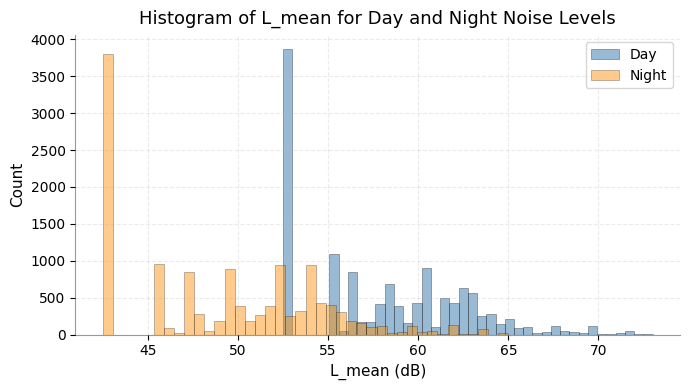

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 4))

# histograms (same axis)
ax.hist(
    df_noise_day["L_mean"].dropna(),
    bins=40,
    color="steelblue",
    edgecolor="black",
    linewidth=0.4,
    alpha=0.55,
    label="Day"
)
ax.hist(
    df_noise_night["L_mean"].dropna(),
    bins=40,
    color="darkorange",
    edgecolor="black",
    linewidth=0.4,
    alpha=0.45,
    label="Night"
)

# titles and labels
ax.set_title("Histogram of L_mean for Day and Night Noise Levels", fontsize=13, pad=8)
ax.set_xlabel("L_mean (dB)", fontsize=11)
ax.set_ylabel("Count", fontsize=11)

# grid
ax.grid(True, linestyle="--", alpha=0.25)

# remove top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# soften left and bottom spines
ax.spines["left"].set_alpha(0.4)
ax.spines["bottom"].set_alpha(0.4)

ax.legend()
plt.tight_layout()
plt.show()


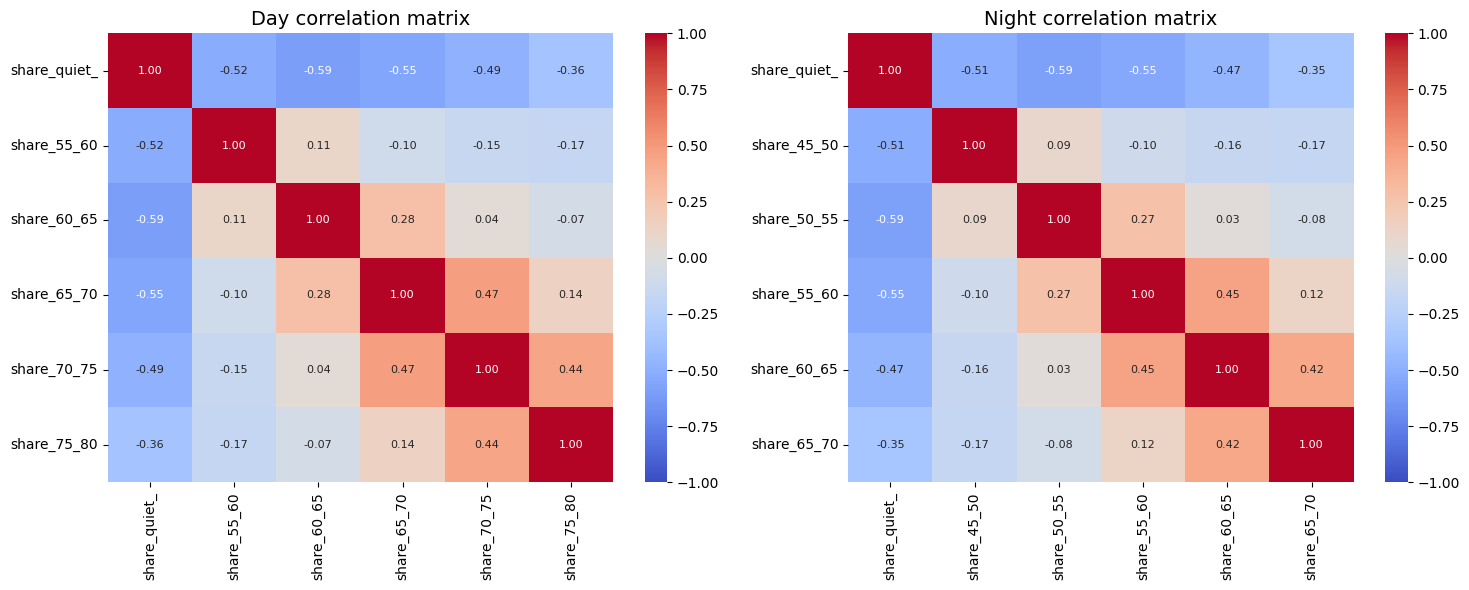

In [18]:
import seaborn as sns

share_cols = [c for c in df_noise_day.columns if c.startswith("share_")]

corr_day = df_noise_day[share_cols].drop(['share_45_50', 'share_50_55'], axis=1).corr() # dropeped all 0 columns to have better visualization
corr_night = df_noise_night[share_cols].drop(['share_70_75', 'share_75_80'], axis=1).corr() # dropeped all 0 columns to have better visualization

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(
    corr_day,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    annot_kws={"size": 8},
    ax=axes[0]
)
axes[0].set_title("Day correlation matrix", fontsize=14)

sns.heatmap(
    corr_night,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    annot_kws={"size": 8},
    ax=axes[1]
)
axes[1].set_title("Night correlation matrix", fontsize=14)

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'KDE of L_mean: Day vs Night')

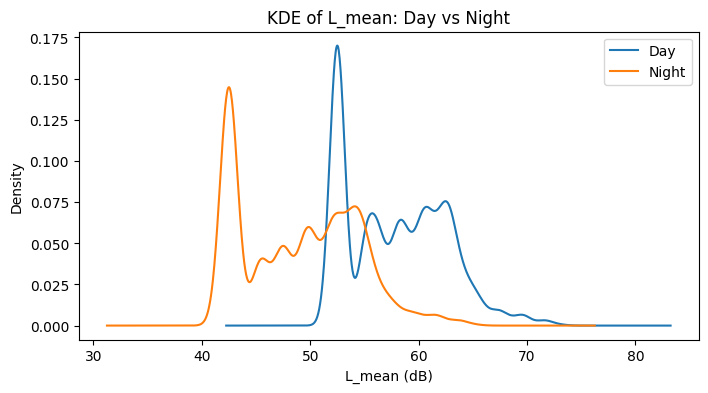

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
df_noise_day["L_mean"].plot(kind="kde", label="Day")
df_noise_night["L_mean"].plot(kind="kde", label="Night")
plt.xlabel("L_mean (dB)")
plt.ylabel("Density")
plt.legend()
plt.title("KDE of L_mean: Day vs Night")

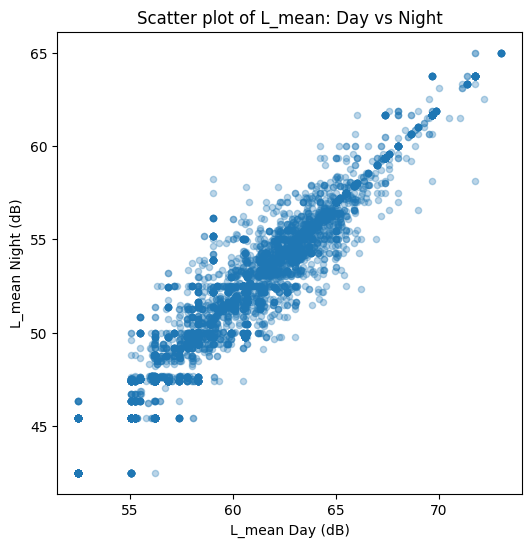

In [20]:
merged = df_noise_day[["GRID_ID", "L_mean"]].merge(
    df_noise_night[["GRID_ID", "L_mean"]],
    on="GRID_ID",
    suffixes=("_day", "_night")
)

merged.plot.scatter("L_mean_day", "L_mean_night", alpha=0.3, figsize=(6,6))
plt.xlabel("L_mean Day (dB)")
plt.ylabel("L_mean Night (dB)")
plt.title("Scatter plot of L_mean: Day vs Night")
plt.show()

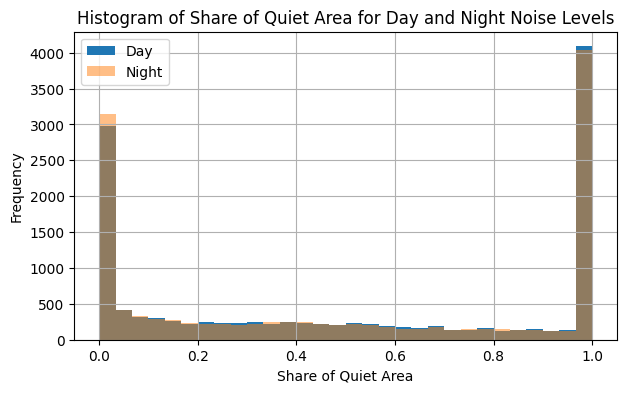

In [21]:
df_noise_day["share_quiet_"].hist(bins=30, figsize=(7,4))
df_noise_night["share_quiet_"].hist(bins=30, figsize=(7,4), alpha=0.5)
plt.xlabel('Share of Quiet Area')
plt.ylabel('Frequency')
plt.title('Histogram of Share of Quiet Area for Day and Night Noise Levels')
plt.legend(['Day', 'Night'])
plt.show()

In [22]:
df_noise_day = pd.read_csv('/home/s232713/data/Noise/grid_noise_day.csv')
df_noise_night = pd.read_csv('/home/s232713/data/Noise/grid_noise_night.csv')

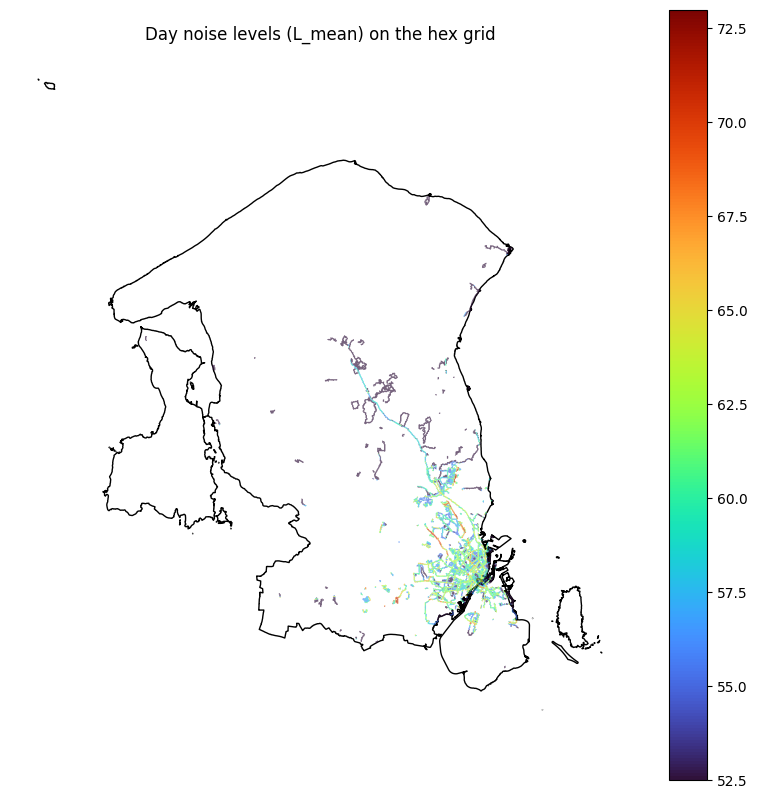

In [23]:
gdf_grid = gpd.read_file('/home/s232713/data/grid_data/cph_hexgrid.geojson')
boundary = gpd.read_file('/home/s232713/data/grid_data/copenhagen_union_boundary.geojson').to_crs(gdf_grid.crs)

gdf_day = gdf_grid.merge(df_noise_day[["GRID_ID", "L_mean"]], on="GRID_ID")

fig, ax = plt.subplots(figsize=(10,10))

boundary.plot(ax=ax, color="white", edgecolor="black", linewidth=1)
gdf_day.plot(
    ax=ax,
    column="L_mean",
    cmap="turbo",   # or "viridis", "plasma", "inferno"
    legend=True,
    alpha=0.9,
    linewidth=0
)

ax.set_title("Day noise levels (L_mean) on the hex grid")
ax.set_axis_off()
plt.show()


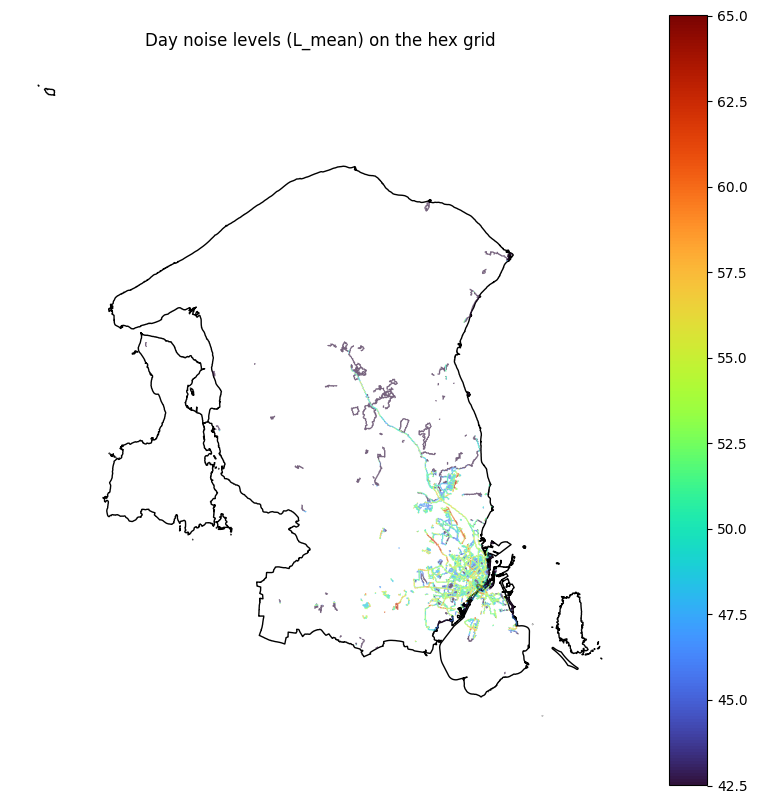

In [24]:
gdf_grid = gpd.read_file('/home/s232713/data/grid_data/cph_hexgrid.geojson')
boundary = gpd.read_file('/home/s232713/data/grid_data/copenhagen_union_boundary.geojson').to_crs(gdf_grid.crs)

gdf_day = gdf_grid.merge(df_noise_night[["GRID_ID", "L_mean"]], on="GRID_ID")

fig, ax = plt.subplots(figsize=(10,10))

boundary.plot(ax=ax, color="white", edgecolor="black", linewidth=1)
gdf_day.plot(
    ax=ax,
    column="L_mean",
    cmap="turbo",   # or "viridis", "plasma", "inferno"
    legend=True,
    alpha=0.9,
    linewidth=0
)

ax.set_title("Day noise levels (L_mean) on the hex grid")
ax.set_axis_off()
plt.show()

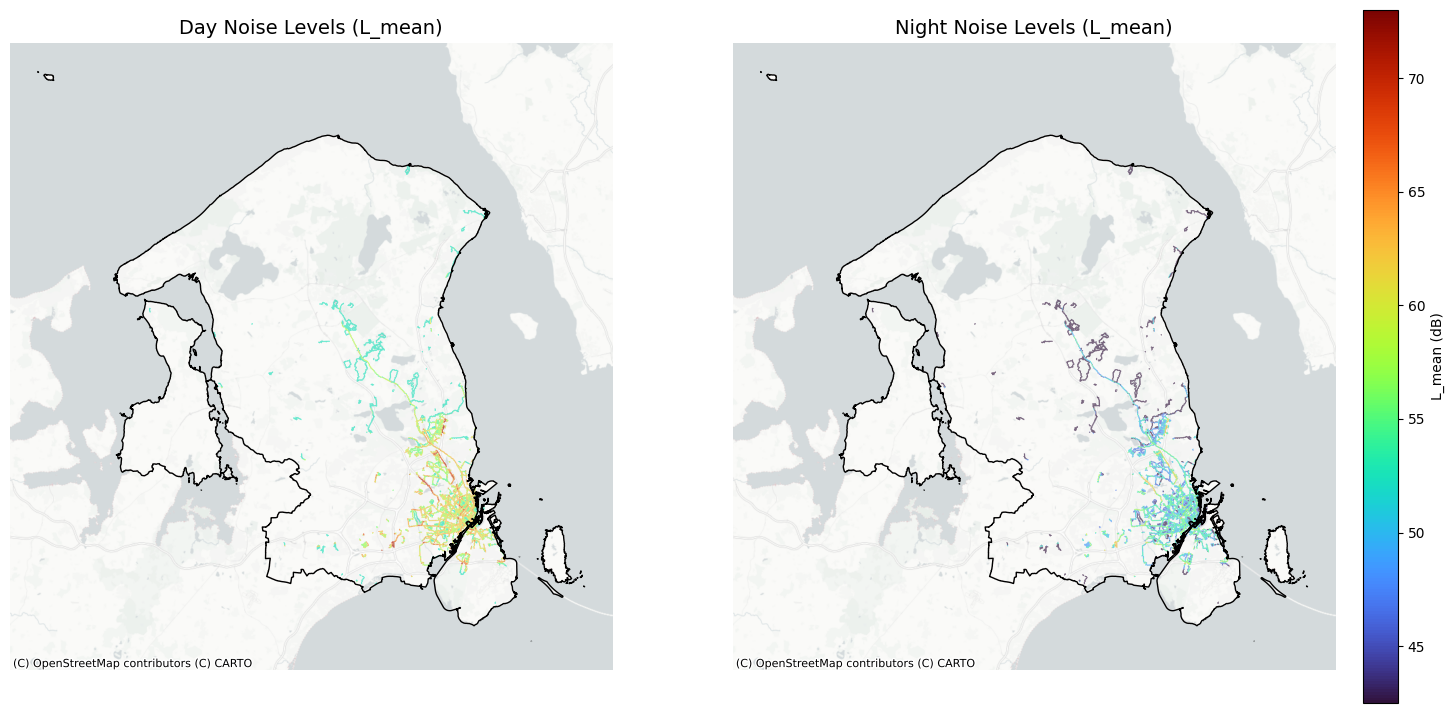

In [29]:
import contextily as ctx

# 1) safer merges (keep all active cells even if noise missing)
gdf_day   = gdf_grid.merge(df_noise_day[["GRID_ID", "L_mean"]],   on="GRID_ID", how="left", validate="1:1")
gdf_night = gdf_grid.merge(df_noise_night[["GRID_ID", "L_mean"]], on="GRID_ID", how="left", validate="1:1")

# 2) put everything in Web Mercator for a clean basemap
boundary_3857 = boundary.to_crs(epsg=3857)
gdf_day_3857 = gdf_day.to_crs(epsg=3857)
gdf_night_3857 = gdf_night.to_crs(epsg=3857)

# 3) shared colour scale + one shared colorbar (disable geopandas legends)
vmin = np.nanmin([gdf_day_3857["L_mean"].min(), gdf_night_3857["L_mean"].min()])
vmax = np.nanmax([gdf_day_3857["L_mean"].max(), gdf_night_3857["L_mean"].max()])
norm = plt.Normalize(vmin=vmin, vmax=vmax)

fig, axes = plt.subplots(1, 2, figsize=(18, 9))

# DAY
boundary_3857.plot(ax=axes[0], color="none", edgecolor="black", linewidth=1, zorder=3)
gdf_day_3857.plot(
    ax=axes[0],
    column="L_mean",
    cmap="turbo",
    norm=norm,
    alpha=0.85,
    linewidth=0,
    missing_kwds={"color": "none", "label": "Missing"},
    zorder=2
)
axes[0].set_title("Day Noise Levels (L_mean)", fontsize=14)
axes[0].set_axis_off()

# NIGHT
boundary_3857.plot(ax=axes[1], color="none", edgecolor="black", linewidth=1, zorder=3)
gdf_night_3857.plot(
    ax=axes[1],
    column="L_mean",
    cmap="turbo",
    norm=norm,
    alpha=0.85,
    linewidth=0,
    missing_kwds={"color": "none"},
    zorder=2
)
axes[1].set_title("Night Noise Levels (L_mean)", fontsize=14)
axes[1].set_axis_off()

# 4) basemap on BOTH panels (and use a reliable provider)
for ax in axes:
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.PositronNoLabels, zorder=1)

# 5) one shared colorbar
sm = plt.cm.ScalarMappable(norm=norm, cmap="turbo")
sm.set_array([])
cbar = fig.colorbar(sm, ax=axes, fraction=0.03, pad=0.02)
cbar.set_label("L_mean (dB)")

#plt.tight_layout()
plt.show()


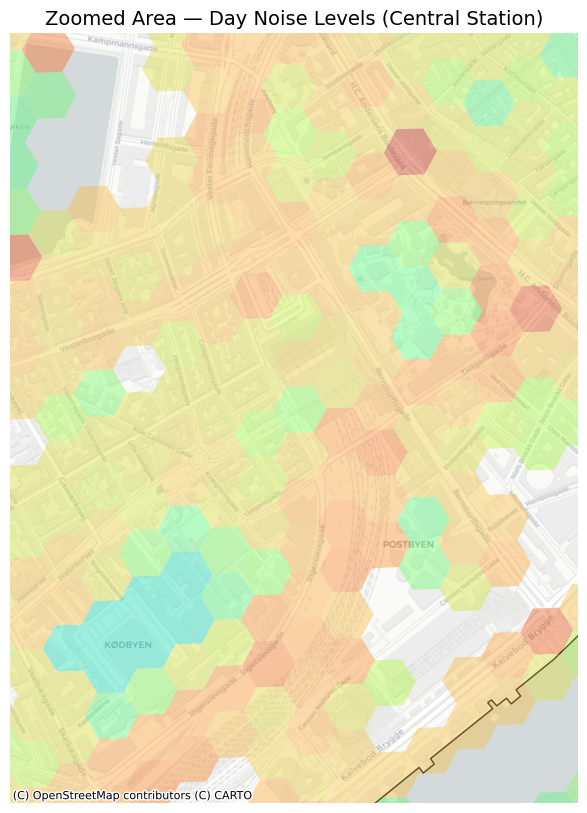

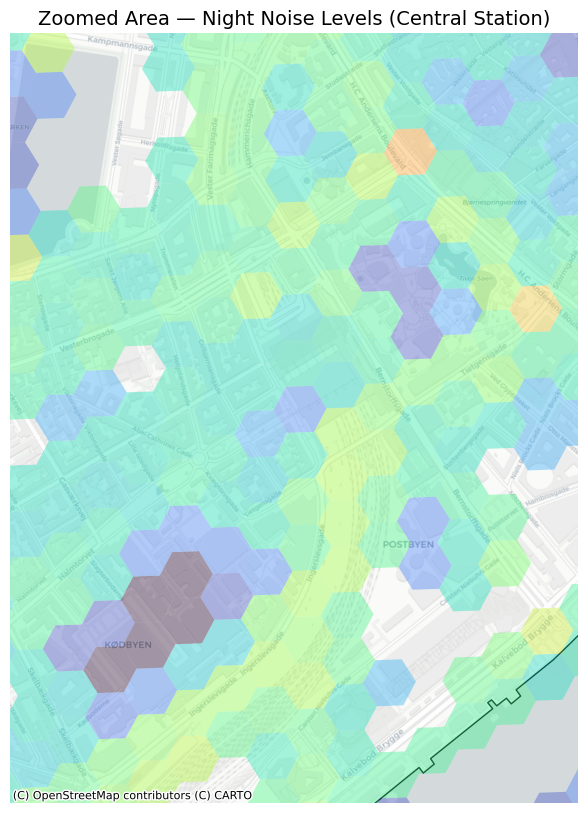

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import box

gdf_day = gdf_grid.merge(df_noise_day[["GRID_ID", "L_mean"]], on="GRID_ID") # change here for day and night 

gdf_day_3857 = gdf_day.to_crs(epsg=3857)
boundary_3857 = boundary.to_crs(epsg=3857)

bbox_wgs = box(12.556, 55.665, 12.573, 55.678)  # Central Station area
bbox_3857 = gpd.GeoSeries([bbox_wgs], crs="EPSG:4326").to_crs(epsg=3857) # convert to 3857 coordinates
xmin, ymin, xmax, ymax = bbox_3857.total_bounds

fig, ax = plt.subplots(figsize=(10,10))

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

boundary_3857.plot(ax=ax, facecolor="none", edgecolor="black")
gdf_day_3857.plot(
    ax=ax,
    column="L_mean",
    cmap="turbo",
    vmin=vmin,
    vmax=vmax,
    alpha=0.4,
    linewidth=0
)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron) # basemap of cph 

ax.set_title("Zoomed Area — Day Noise Levels (Central Station)", fontsize=14)
ax.set_axis_off()

plt.show()

outpath = "/home/s232713/figures/noise_zoom_kbhk_day.pdf"
fig.savefig(
    outpath,
    format="pdf",
    bbox_inches="tight"
)

plt.close(fig)

import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import box

gdf_day = gdf_grid.merge(df_noise_night[["GRID_ID", "L_mean"]], on="GRID_ID") # change here for day and night 

gdf_day_3857 = gdf_day.to_crs(epsg=3857)
boundary_3857 = boundary.to_crs(epsg=3857)

bbox_wgs = box(12.556, 55.665, 12.573, 55.678)  # Central Station area
bbox_3857 = gpd.GeoSeries([bbox_wgs], crs="EPSG:4326").to_crs(epsg=3857) # convert to 3857 coordinates
xmin, ymin, xmax, ymax = bbox_3857.total_bounds

fig, ax = plt.subplots(figsize=(10,10))

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

boundary_3857.plot(ax=ax, facecolor="none", edgecolor="black")
gdf_day_3857.plot(
    ax=ax,
    column="L_mean",
    cmap="turbo",
    vmin=vmin,
    vmax=vmax,
    alpha=0.4,
    linewidth=0
)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron) # basemap of cph 

ax.set_title("Zoomed Area — Night Noise Levels (Central Station)", fontsize=14)
ax.set_axis_off()

plt.show()

outpath = "/home/s232713/figures/noise_zoom_kbhk_night.pdf"
fig.savefig(
    outpath,
    format="pdf",
    bbox_inches="tight"
)


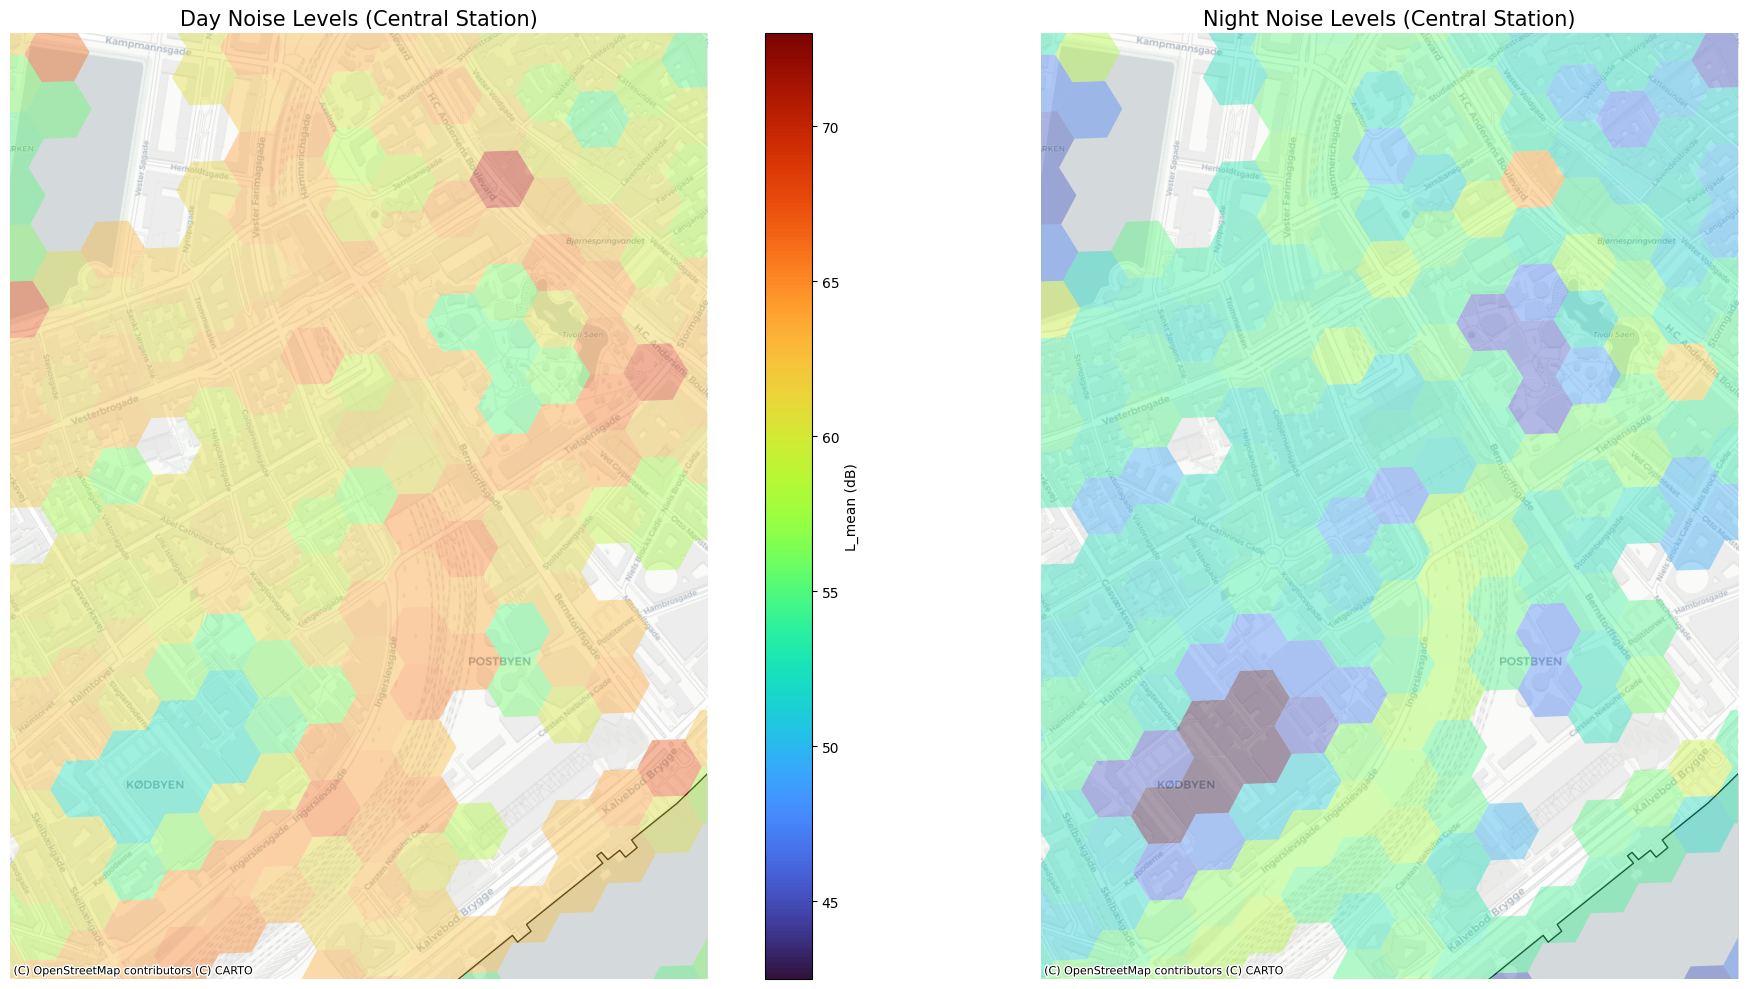

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import box

# --- 1. Merge noise with grid ---
gdf_day  = gdf_grid.merge(df_noise_day[["GRID_ID", "L_mean"]],   on="GRID_ID")
gdf_night = gdf_grid.merge(df_noise_night[["GRID_ID", "L_mean"]], on="GRID_ID")

# --- 2. Project to Web Mercator for basemap ---
gdf_day_3857   = gdf_day.to_crs(epsg=3857)
gdf_night_3857 = gdf_night.to_crs(epsg=3857)
boundary_3857  = boundary.to_crs(epsg=3857)

# --- 3. Bounding box (adjusted) ---
bbox_wgs  = box(12.556, 55.665, 12.573, 55.678)  # your tuned box
bbox_3857 = gpd.GeoSeries([bbox_wgs], crs="EPSG:4326").to_crs(epsg=3857)
xmin, ymin, xmax, ymax = bbox_3857.total_bounds

# --- 4. Shared colour scale ---
vmin = min(gdf_day["L_mean"].min(), gdf_night["L_mean"].min())
vmax = max(gdf_day["L_mean"].max(), gdf_night["L_mean"].max())

# --- 5. Plot side by side ---
fig, axes = plt.subplots(1, 2, figsize=(22, 10))

for ax, gdf, title in [
    (axes[0], gdf_day_3857, "Day Noise Levels (Central Station)"),
    (axes[1], gdf_night_3857, "Night Noise Levels (Central Station)")
]:
    # zoom
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

    # outline of city
    boundary_3857.plot(ax=ax, facecolor="none", edgecolor="black")

    # noise hexes
    gdf.plot(
        ax=ax,
        column="L_mean",
        cmap="turbo",
        vmin=vmin,
        vmax=vmax,
        alpha=0.40,
        linewidth=0,
        legend=(ax == axes[0]),
        legend_kwds={"label": "L_mean (dB)"}
    )

    # basemap
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

    ax.set_title(title, fontsize=15)
    ax.set_axis_off()

plt.tight_layout()
plt.show()
